In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Add average temperature lines and legends
non_equil_T = 326.762
equil_T = 299.944

kb = 1.380649 * (10**-23)
n_atoms = 1231
normalization_target = 3 * n_atoms


# Function to process data from a single file
def plot_mmat_energy(ax, mmat_data, eigenvalues, eval_index=0, color="black",legend=False,yaxis=False,eigen=True):
    # Constants and scaling
    scaling_factor = 10 / (8.3145 * (2500000 ** 2) * (2 * 500 - 1))
    energy_in_each_mode = [(2 * np.sum(mode) - mode[0]) * scaling_factor for mode in mmat_data[1:]]
    selected_eigenvalues = eigenvalues[eval_index]

    # Plot energy as a solid color
    ax.plot(range(len(energy_in_each_mode)), energy_in_each_mode[:len(selected_eigenvalues)], 'o', color=color)

    # Add equilibrium and non-equilibrium temperature lines
    non_equil_T = 326.762
    equil_T = 299.944
    #equil_line = ax.axhline(y=equil_T, color='blue', linestyle='--', label="Ave. Equil Temp")
    #non_equil_line = ax.axhline(y=non_equil_T, color='orange', linestyle='--', label="Ave. Non Equil Temp")


    
    # Create legend markers
    blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Equilibrium System')
    red_dot = mlines.Line2D([], [], color='orangered', marker='o', linestyle='None', markersize=10, label='Nonequilibrium System')
    eigen_dot = mlines.Line2D([], [], color='black', marker=None, linestyle='-', markersize=10, label="Eigenvalues")

    
    # Add legend
    if legend==True:
        ax.legend(handles=[blue_dot, red_dot, equil_line, non_equil_line, eigen_dot], loc="upper center", fontsize=24)

    
        
    if yaxis==True:
        # Labels and title
        #ax.set_title("200 $cm^{-1}$", fontsize=32)
        ax.set_xlabel("Mode #", fontsize=32)
        ax.set_ylabel("Temperature (K)", fontsize=32)
        
        
    # Create secondary y-axis for eigenvalues
        ax2.set_ylabel("Contrib. to VDoS", fontsize=32, color='black')

    ax.set_ylim(275, 350)
    ax.tick_params(axis='both', which='major', labelsize=28)

    if eigen==True:
        selected_eigenvalues = [val / max(selected_eigenvalues) for val in selected_eigenvalues]
        ax2 = ax.twinx()
        ax2.plot(range(len(selected_eigenvalues[:1000])), selected_eigenvalues[:1000], color='black', label="Eigenvalues", linewidth = 4)        
        ax2.tick_params(axis='y', labelsize=28, colors='black')
        return ax, ax2
    else:
        return ax







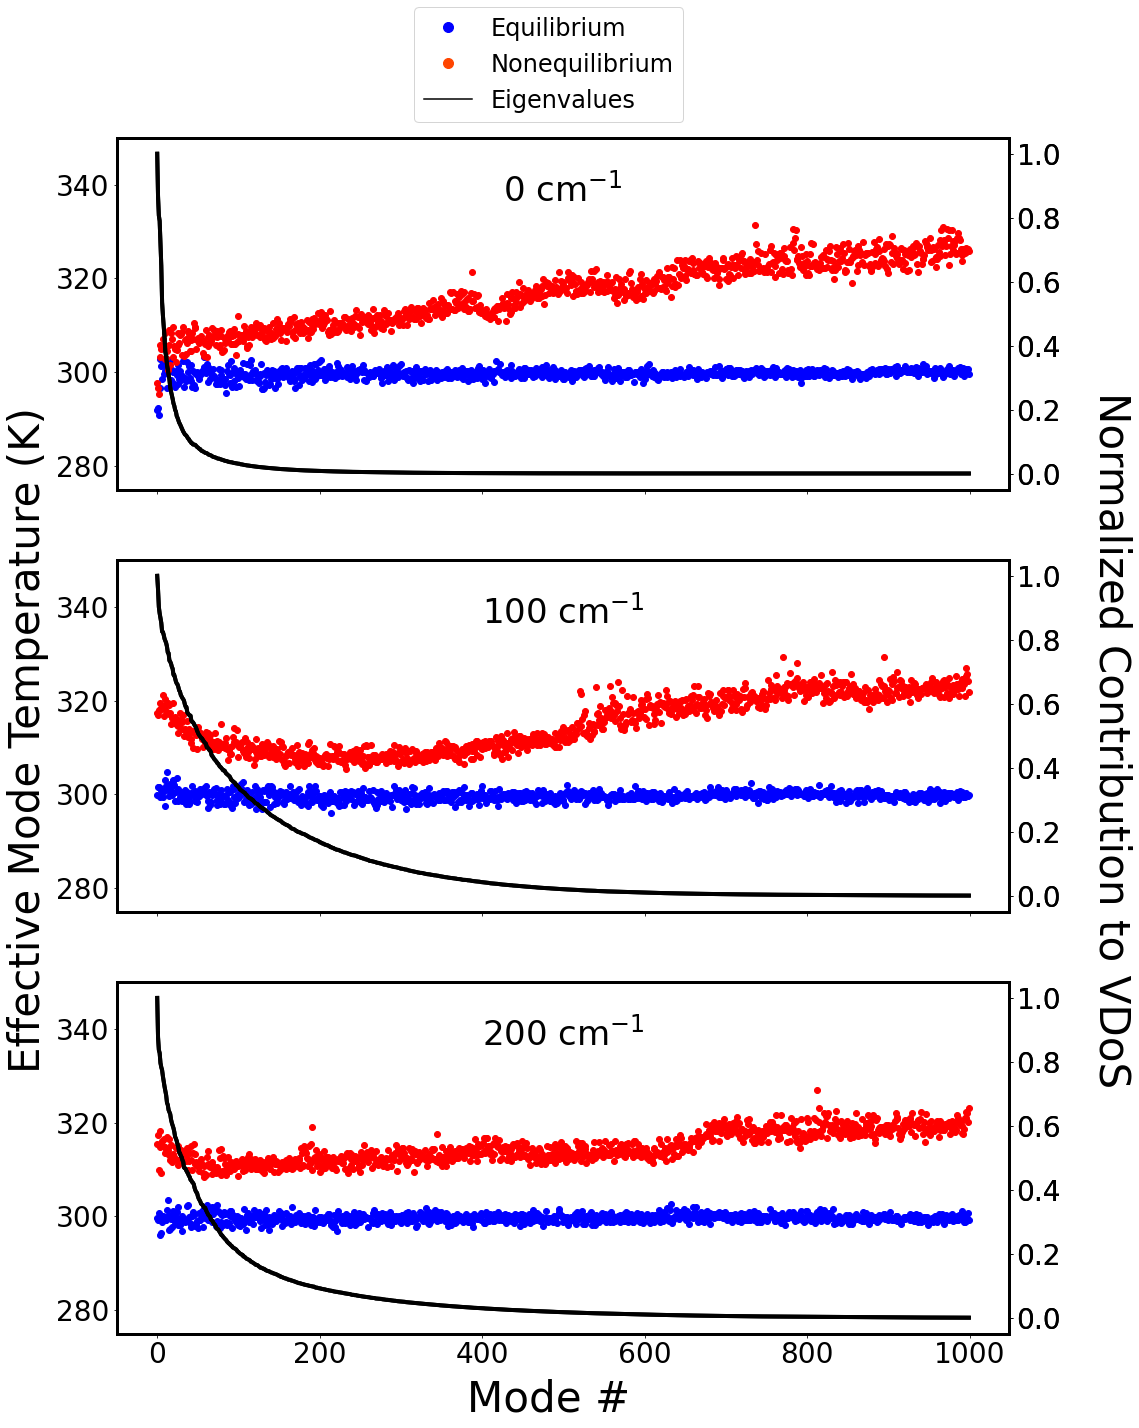

In [2]:
def load_data(path):
    return np.loadtxt(path)

def plot_combined_vdos():
    # Define paths
    paths = [
        ('../data/equil_data/freq1_1d_vdos.dat',
         '../data/non_equil_data/freq1_1d_vdos.dat',
         0, "0 $\mathrm{cm}^{-1}$"),
        
        ('../data/equil_data/freq11_1d_vdos.dat',
         '../data/non_equil_data/freq11_1d_vdos.dat',
         12, "100 $\mathrm{cm}^{-1}$"),
        
        ('../data/equil_data/freq23_1d_vdos.dat',
         '../data/non_equil_data/freq23_1d_vdos.dat',
         24, "200 $\mathrm{cm}^{-1}$")
    ]
    
    evals_path = "../data/eval_covar_fres_coars_test.out.mmat.dat"
    evals_data = load_data(evals_path)
    
    fig, axes = plt.subplots(nrows=3, figsize=(16, 22), sharex=True)

    
    for ax, (e_path, ne_path, eval_index, title) in zip(axes, paths):
        samp_data = load_data(e_path)
        ne_samp_data = load_data(ne_path)
        
        plot_mmat_energy(ax, samp_data, evals_data, eval_index=eval_index, color='blue')
        ax.text(0.5, 0.9, title, transform=ax.transAxes,
        fontsize=34, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.0))
        plot_mmat_energy(ax, ne_samp_data, evals_data, eval_index=eval_index, color='red')
        ax.spines['top'].set_linewidth(3)
        ax.spines['right'].set_linewidth(3)
        ax.spines['bottom'].set_linewidth(3)
        ax.spines['left'].set_linewidth(3)
        #ax.set_ylabel('Eff. Temp', fontsize=28)
    
    # Create legend markers
    blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Equilibrium')
    red_dot = mlines.Line2D([], [], color='orangered', marker='o', linestyle='None', markersize=10, label='Nonequilibrium')
    #equil_line = mlines.Line2D([], [], color='blue', linestyle='--', markersize=10, label="Ave. Equil. Temp.")
    #non_equil_line = mlines.Line2D([], [], color='orange', linestyle='--', markersize=10, label="Ave. Non Equil. Temp.")
    eigen_dot = mlines.Line2D([], [], color='black', marker=None, linestyle='-', markersize=10, label="Eigenvalues")
    
    
    # Place legend on top of the frame
    fig.legend(handles=[blue_dot, red_dot, eigen_dot], loc='upper center', fontsize=24, bbox_to_anchor=(0.5, 0.97), ncol=1)
    fig.supylabel("Effective Mode Temperature (K)", fontsize=42, x=0.03, rotation=90, verticalalignment='center')
    fig.supxlabel("Mode #", fontsize=42, y=0.07, horizontalalignment='center')
    fig.text(0.97, 0.5, "Normalized Contribution to VDoS", fontsize=42, rotation=-90, verticalalignment='center')

    #plt.tight_layout()
    #plt.xlabel("Frequency (cm$^{-1}$)", fontsize=32)
    plt.savefig('combined_temps.png')
    plt.show()

# Call the function to generate the plot
plot_combined_vdos()
